In [1]:
# Setting a random seed using my college enrollment number.
student_number = 23338806
import numpy as np
np.random.seed(student_number)


In [1]:
# Step 1: Load and Prepare Data

import pandas as pd

data = pd.read_csv('mlr6.csv')
print("First Few Rows of Data:")
print(data.head())

# Map categorical values to numerical values in column 'x3'
category_mapping = {'A': 1, 'B': 2, 'C': 3}
data['x3_num'] = data['x3'].map(category_mapping)
print("\nConsidering A=1,B=2,C=3 first 5 columns of data set is: \n",data.head())

# Fill missing values with the median
for column in data.columns:
    if data[column].isnull().any():
        data[column].fillna(data[column].median(), inplace=True)

print("Missing Values in Each Column:\n", data.isnull().sum())


First Few Rows of Data:
              y         x1          x2 x3
0  16270.189819  54.290459  196.243633  C
1  18169.456998  54.065187  204.141635  A
2  15559.583612  51.437386  198.786582  A
3  16087.907983  52.206995  194.490189  C
4  16374.396237  55.142860  197.968667  C

Considering A=1,B=2,C=3 first 5 columns of data set is: 
               y         x1          x2 x3  x3_num
0  16270.189819  54.290459  196.243633  C       3
1  18169.456998  54.065187  204.141635  A       1
2  15559.583612  51.437386  198.786582  A       1
3  16087.907983  52.206995  194.490189  C       3
4  16374.396237  55.142860  197.968667  C       3
Missing Values in Each Column:
 y         0
x1        0
x2        0
x3        0
x3_num    0
dtype: int64


In [3]:
# Step 2: Exploratory Data Analysis (EDA)
# ######################################
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for the dataset
print("Summary Statistics for Complete Dataset:\n", data.describe())
print("\nValue Counts for 'x3':\n", data['x3'].value_counts())

Summary Statistics for Complete Dataset:
                   y           x1           x2       x3_num
count   1000.000000  1000.000000  1000.000000  1000.000000
mean   15461.118352    49.995868   199.921427     1.985000
std     1795.134480     4.914345     4.348718     0.772899
min     7972.734953    33.147892   186.235221     1.000000
25%    14434.325581    47.268212   197.441882     1.000000
50%    15521.006387    49.963315   199.910862     2.000000
75%    16538.968858    53.006301   202.461691     3.000000
max    21565.781403    69.425729   214.460893     3.000000

Value Counts for 'x3':
 x3
B    403
A    306
C    291
Name: count, dtype: int64


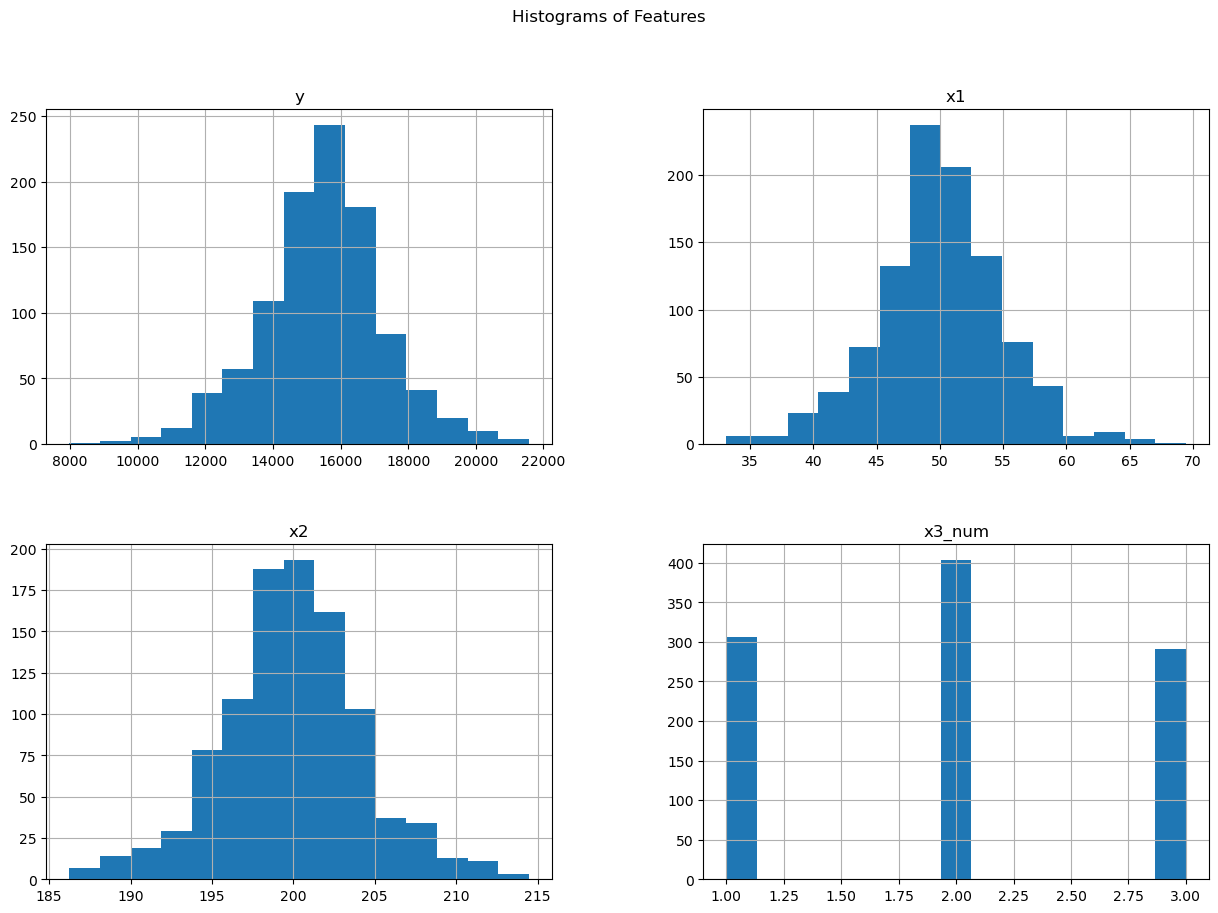

In [4]:
# Histograms for feature distribution
data.hist(bins=15, figsize=(15, 10), layout=(2, 2))
plt.suptitle('Histograms of Features')
plt.show()

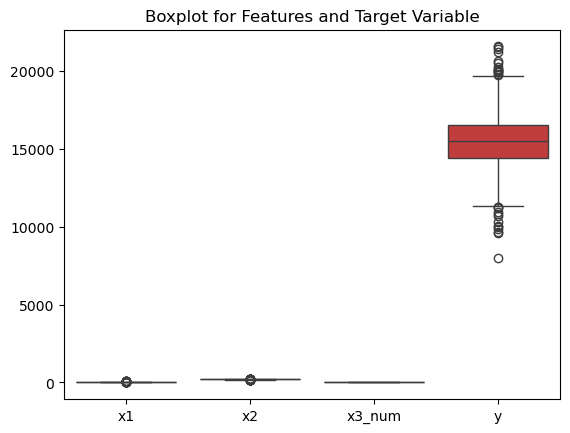

In [5]:
# Boxplots for Feature and Target Variable Outlier Detection
sns.boxplot(data=data[['x1', 'x2', 'x3_num', 'y']])
plt.title('Boxplot for Features and Target Variable')
plt.show()

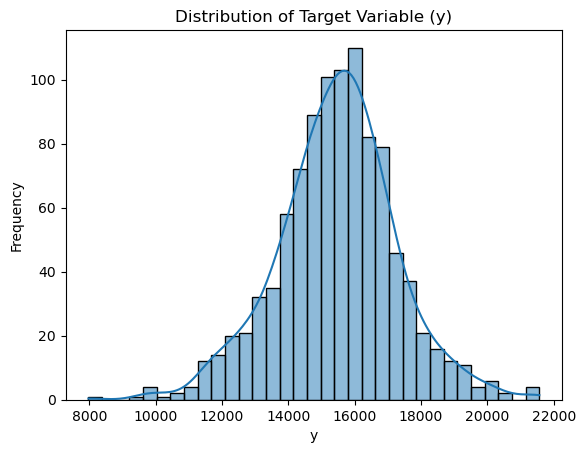

In [6]:
# Distribution of Target Variable
sns.histplot(data["y"], kde=True)
plt.title('Distribution of Target Variable (y)')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.show()

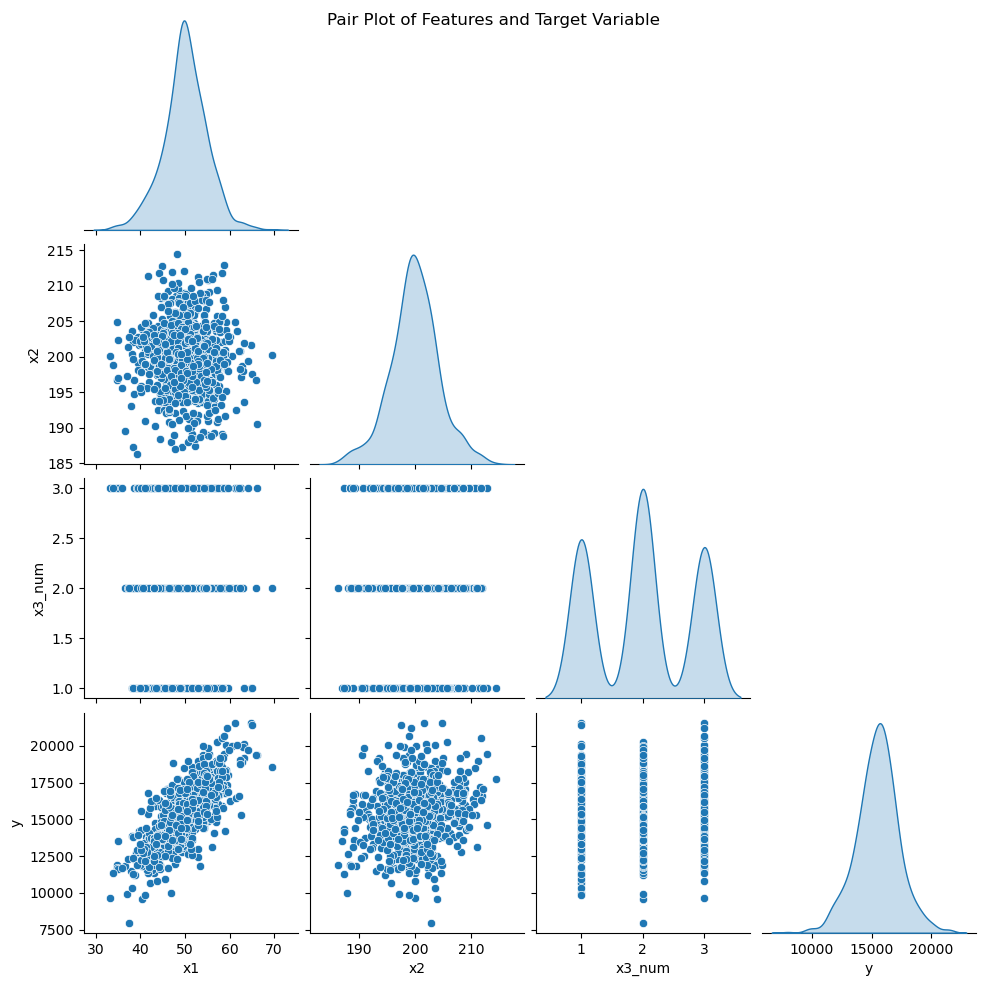

In [7]:
# Pairplot to explore relationships between features and target
sns.pairplot(data=data[['x1', 'x2', 'x3_num', 'y']], diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Features and Target Variable',)
plt.show()

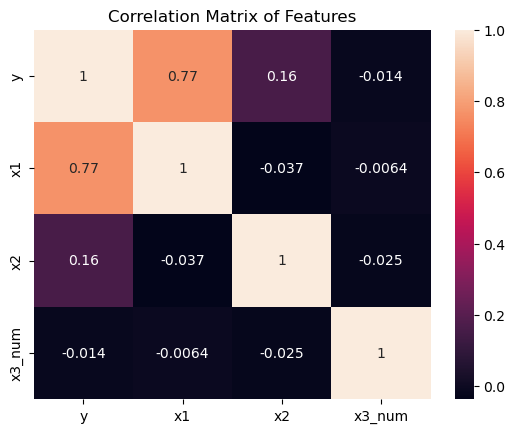

In [8]:
# Correlation Matrix for Multicollinearity Check
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True)
plt.title('Correlation Matrix of Features')
plt.show()

In [9]:
# Step 3: Define Features and Target

X = data[['x1', 'x2', 'x3_num']]
y = data['y']

In [10]:
# Step 4: Split Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=student_number)
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)

Training Set Shape: (700, 3) (700,)
Testing Set Shape: (300, 3) (300,)


In [61]:
# Step 5: Model Construction

import statsmodels.api as sm

# Adding a constant to include the intercept in the model
X_train_sm = sm.add_constant(X_train)
#print(X_train_sm.head())
model = sm.OLS(y_train, X_train_sm).fit()
print("\nModel Summary:")
print(model.summary())

     const         x1          x2  x3_num
453    1.0  49.554544  196.519258       3
622    1.0  46.218705  202.113558       2
234    1.0  45.281757  192.405633       2
440    1.0  45.387158  206.969096       1
420    1.0  47.036077  196.648593       3

Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     400.9
Date:                Sat, 30 Nov 2024   Prob (F-statistic):          3.64e-151
Time:                        23:01:42   Log-Likelihood:                -5917.1
No. Observations:                 700   AIC:                         1.184e+04
Df Residuals:                     696   BIC:                         1.186e+04
Df Model:                           3                                         
Covariance Type:     

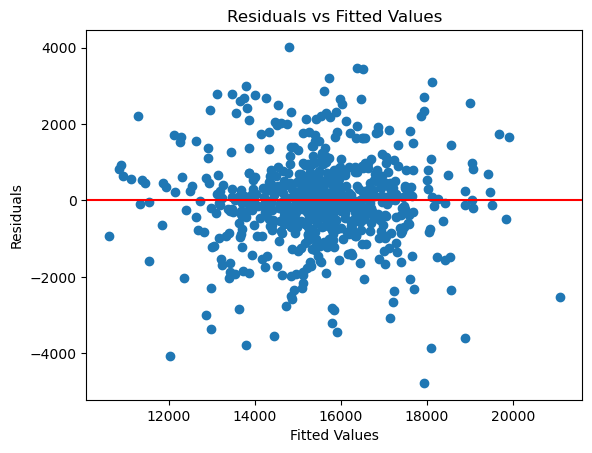

In [25]:
# Step 6: Model Diagnostics

# 6.1 Residual Plot for Homoscedasticity
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(color='red')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

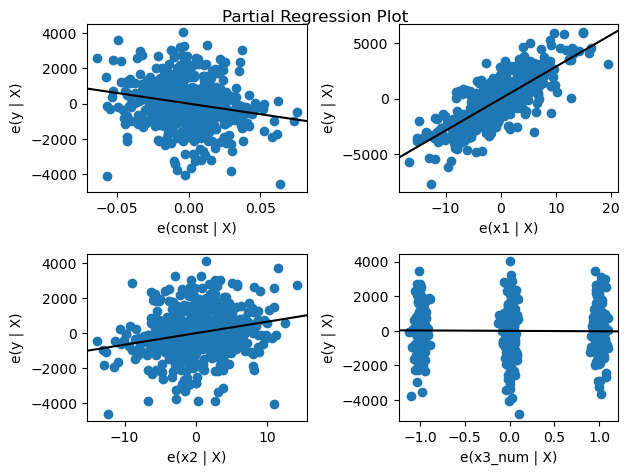

In [13]:
#6.2 Partial Residual Plots to Analyze the Effect of Individual Predictors
sm.graphics.plot_partregress_grid(model)
plt.show()

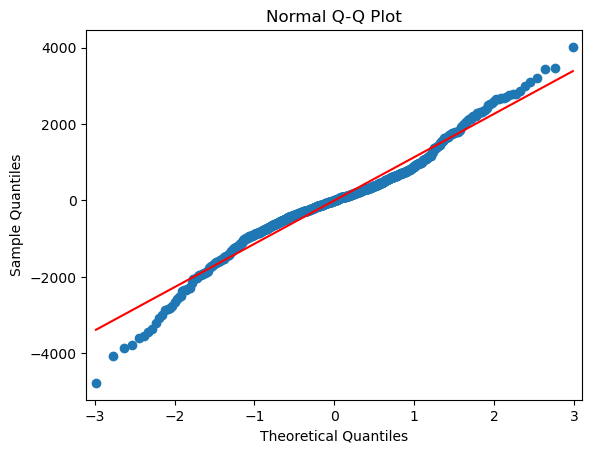

In [29]:
# 6.3 Q-Q Plot for Normality of Residuals
sm.qqplot(model.resid, line='s')
plt.title('Normal Q-Q Plot')
plt.show()

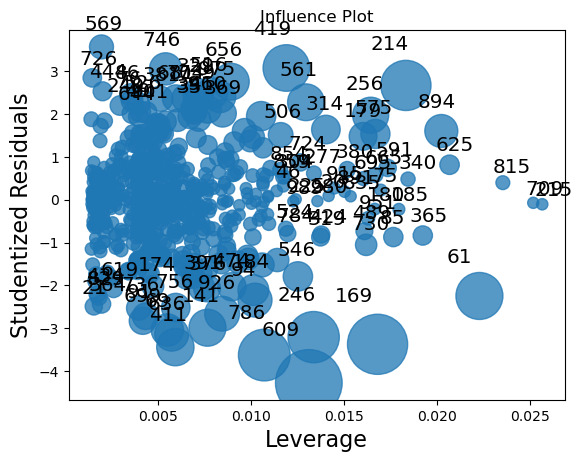

In [37]:
# 6.4 Influence Plot for Outlier Detection
sm.graphics.influence_plot(model)
plt.title('Influence Plot')
plt.show()


In [16]:
# 6.5 Condition Number for Multicollinearity
condition_number = np.linalg.cond(model.model.exog)
print(f"\nCondition Number: {condition_number}")


Condition Number: 10085.793868975412


In [98]:
# Step 7: Additional Statistical Tests for Assumptions

from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro

# 7.1 Breusch-Pagan Test for Homoscedasticity
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print("\nBreuschPagan Test Results:")
print(dict(zip(labels, bp_test)))

# 7.2 Durbin-Watson Test for Independence of Residuals
dw_stat = durbin_watson(model.resid)
print(f"\nDurbin-Watson Statistic: {dw_stat}")

# 7.3 Shapiro-Wilk Test for Normality of Residuals
shapiro_test = shapiro(model.resid)
print(f"\nShapiro-Wilk Test p-value: {shapiro_test.pvalue:.4f}")

from scipy.stats import jarque_bera

# 7.4 Jarque-Bera Test for Normality of Residuals
jb_test = jarque_bera(model.resid)
print(f"\nJarque-Bera Test Statistic: {jb_test.statistic}, p-value: {jb_test.pvalue:.4f}")

# 7.5 Variance Inflation Factor (VIF) for Multicollinearity
X_vif = sm.add_constant(X_train)

vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns

# Calculate VIF for each feature
vif_values = []
for i in range(X_vif.shape[1]):
    vif_values.append(variance_inflation_factor(X_vif.values, i))
    
vif_data['VIF'] = vif_values # Assign calculated VIF values to the DataFrame
print(f"\nVariance Inflation Factor for Each Feature:\n{vif_data}")


BreuschPagan Test Results:
{'LM Statistic': 0.7910325958739972, 'LM-Test p-value': 0.8516106941304953, 'F-Statistic': 0.26246740359195947, 'F-Test p-value': 0.8524491969817884}

Durbin-Watson Statistic: 2.010340435313877

Shapiro-Wilk Test p-value: 0.0000

Jarque-Bera Test Statistic: 87.45365614585168, p-value: 0.0000

Variance Inflation Factor for Each Feature:
  Feature          VIF
0   const  2390.235009
1      x1     1.000341
2      x2     1.001788
3  x3_num     1.002115


First 5 rows of predicted values of training dataset:
 453    15102.717622
622    14533.014931
234    13626.018474
440    14635.653535
420    14386.288766
dtype: float64
first 5 rows of actual values of training dataset
 453    14889.197549
622    14910.621092
234    13043.860734
440    13788.101432
420    14354.449850
Name: y, dtype: float64
First 5 rows of predicted values of testing dataset
 56     14500.936198
821    14189.867607
456    13950.989776
683    13838.405314
279    16656.530104
dtype: float64
First 5 rows of actual values of testing dataset
 56     13589.509080
821    14647.663941
456    13598.973098
683    13284.086043
279    14739.812033
Name: y, dtype: float64

Training Data Evaluation:
R^2: 0.6334074594802768, Adjusted R^2: 0.6318273192194159, MSE: 1287335.8842283012, RMSE: 1134.6082514367245, MAE: 809.8854507946382

Testing Data Evaluation:
R^2: 0.5869718490509381, Adjusted R^2: 0.58, MSE: 1046589.9810827037, RMSE: 1023.0298045915885, MAE: 755.0945644148849


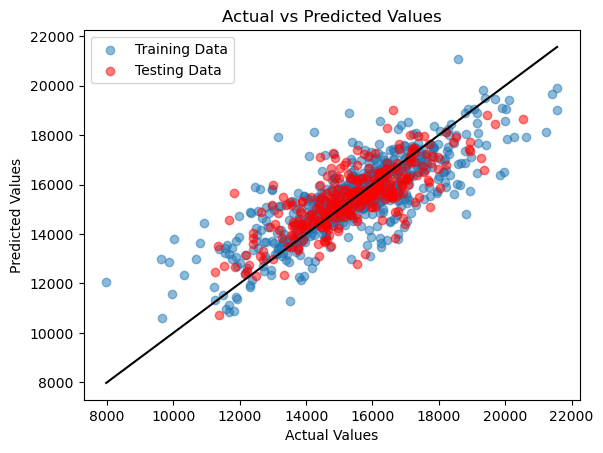

In [99]:
# Step 8: Model Evaluation on Training and Testing Data

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Adding constant to test data for evaluation
X_test_sm = sm.add_constant(X_test)

# Predict on training and test sets
y_train_pred = model.predict(X_train_sm)
print(f"First 5 rows of predicted values of training dataset:\n {y_train_pred.head()}")
print(f"first 5 rows of actual values of training dataset\n {y_train.head()}")
y_test_pred = model.predict(X_test_sm)
print(f"First 5 rows of predicted values of testing dataset\n {y_test_pred.head()}")
print(f"First 5 rows of actual values of testing dataset\n {y_test
.head()}")

# Calculate metrics for training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Adjusted R^2 Calculation
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

train_adj_r2 = adjusted_r2(train_r2, X_train.shape[0], X_train.shape[1])
test_adj_r2 = adjusted_r2(test_r2, X_test.shape[0], X_test.shape[1])

print("\nTraining Data Evaluation:")
print(f"R^2: {train_r2}, Adjusted R^2: {train_adj_r2}, MSE: {train_mse}, RMSE: {train_rmse}, MAE: {train_mae}")

print("\nTesting Data Evaluation:")
print(f"R^2: {test_r2}, Adjusted R^2: {test_adj_r2:.2f}, MSE: {test_mse}, RMSE: {test_rmse}, MAE: {test_mae}")

# Ploting Actual vs Predicted Values for Training and Testing Data
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Training Data')
plt.scatter(y_test, y_test_pred, alpha=0.5, label='Testing Data', color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()],color="black")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [91]:
# Step 9: Model Interpretation

# Printing the model coefficients, p-values, and confidence intervals
print("\nModel Coefficients:")
for var, coef in model.params.items():
    print(f"{var}: {coef}")

print("\nP-values for the Coefficients:")
for var, p_value in model.pvalues.items():
    print(f"{var}: {p_value}")

print("\n95% Confidence Intervals for the Coefficients:")
conf_int_df = pd.DataFrame(model.conf_int())
conf_int_df.columns = ['Lower Bound', 'Upper Bound']
print(conf_int_df)

print("\nInterpretation of Statistical Significance (p-value < 0.05):")
for var, p_value in model.pvalues.items():
    if p_value < 0.05:
        print(f"{var} is statistically significant (p-value = {p_value:.3f}) and contributes meaningfully to predicting the target variable.")
    else:
        print(f"{var} is NOT statistically significant (p-value = {p_value:.3f}) and may not contribute meaningfully to predicting the target variable.")






Model Coefficients:
const: -11992.485891447437
x1: 287.84149474883856
x2: 65.64781537801309
x3_num: -23.23686619028055

P-values for the Coefficients:
const: 1.7348706374957217e-08
x1: 1.783308247329939e-150
x2: 2.719086507402151e-10
x3_num: 0.6778516436792079

95% Confidence Intervals for the Coefficients:
         Lower Bound  Upper Bound
const  -16120.732150 -7864.239633
x1        271.256592   304.426397
x2         45.533235    85.762396
x3_num   -133.020028    86.546296

Interpretation of Statistical Significance (p-value < 0.05):
const is statistically significant (p-value = 0.000) and contributes meaningfully to predicting the target variable.
x1 is statistically significant (p-value = 0.000) and contributes meaningfully to predicting the target variable.
x2 is statistically significant (p-value = 0.000) and contributes meaningfully to predicting the target variable.
x3_num is NOT statistically significant (p-value = 0.678) and may not contribute meaningfully to predicting the t